<a href="https://colab.research.google.com/github/taik09/Octopus/blob/master/Copy_of_StartWebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get started

Imoprt modules we'll need to get started



[Requests](http://docs.python-requests.org/en/master/)

[Beautiful soup](https://www.crummy.com/software/BeautifulSoup/)

[Pandas](https://pandas.pydata.org/)

[NLTK](https://www.nltk.org/)


When you have time go read more about them from the links above!

In [0]:
# import request & beautiful soup
# request is for getting content from a URL
# beautiful soup is used to parse through the HTML we get from requests
import requests
from bs4 import BeautifulSoup



Make a request to this page [sageelliott.com/scrape/](https://sageelliott.com/scrape/)

This page has elements I made that will be good practice for web scraping


In [0]:
# Make the request to a url
r = requests.get('https://sageelliott.com/scrape/')


In [0]:
# Lets look at what the request content looks like
print(r.content)

b'<!DOCTYPE html>\n<html>\n\n  <head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n\n  <title>Web Scraping | Sage Elliott</title>\n  <meta name="description" content="I make things.">\n\n  <link rel="stylesheet" href="/css/main.css">\n  <link rel="canonical" href="http://sageelliott.com/scrape/">\n  <link rel="alternate" type="application/rss+xml" title="Sage Elliott" href="http://sageelliott.com/feed.xml">\n  <script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>\n  <script src="/js/bootstrap.min.js"></script>\n  <script src="/js/script.js"></script>\n  <link rel="stylesheet" href="/css/bootstrap.min.css">\n  <link rel="stylesheet" href="/css/bootstrap-theme.min.css">\n  <link rel="stylesheet" href="/css/style.css">\n  <link rel="stylesheet" href="/css/responsive.css">\n  <link href=\'https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400italic,7

use Beautiful soup on content from requests 
This will make it much more readble when we print it out and allow us to use more Beautifulsoup functionality

In [0]:
# use Beautifulsoup on content from request
c = r.content
soup = BeautifulSoup(c)

In [0]:
# Look at the content formatted with Beautifulsoup
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Web Scraping | Sage Elliott</title>
<meta content="I make things." name="description"/>
<link href="/css/main.css" rel="stylesheet"/>
<link href="http://sageelliott.com/scrape/" rel="canonical"/>
<link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott" type="application/rss+xml"/>
<script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>
<script src="/js/bootstrap.min.js"></script>
<script src="/js/script.js"></script>
<link href="/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
<link href="/css/style.css" rel="stylesheet"/>
<link href="/css/responsive.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400italic,700italic,400,700|Alegreya+SC" rel="stylesheet" typ

In [0]:
# using prettify() in Beautiful soup indents HTML like it should be in the web page
# This can make reading teh HTML a little be easier
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Web Scraping | Sage Elliott
  </title>
  <meta content="I make things." name="description"/>
  <link href="/css/main.css" rel="stylesheet"/>
  <link href="http://sageelliott.com/scrape/" rel="canonical"/>
  <link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott" type="application/rss+xml"/>
  <script src="https://code.jquery.com/jquery-2.1.3.min.js">
  </script>
  <script src="/js/bootstrap.min.js">
  </script>
  <script src="/js/script.js">
  </script>
  <link href="/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
  <link href="/css/style.css" rel="stylesheet"/>
  <link href="/css/responsive.css" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400italic,70

Often the content that you want to scrape will be inside a tag like `div` or similar element. 
In this case when we look at our HTML we see that the actual content of the page is inside of a `div` with a class of `main-content`. 

Lets grab all the content inside that `div` and save it to a variable. 

In [0]:
# get elements within the 'main-content' tag
main_content = soup.find('div', attrs = {'class': 'main-content'})
print(main_content)

<div class="main-content">
<h1>Lots of stuff to try web scraping on!</h1>
<p>This page is full of different tags that you will commonly see
    out in the wild on the web!</p>
<h1>Example headlines</h1>
<h2 class="headline">I love this!</h2>
<h2 class="headline">I hate this so much!</h2>
<h2 class="headline">The dumbest thing happened</h2>
<h2 class="headline">This is a great workshop!</h2>
<h2 class="headline">This workshop is horrible</h2>
<h2 class="headline">I'm tired...</h2>
<h2 class="headline">This thing is ok...</h2>
<h1>Example unordered list</h1>
<ul>
<li>Elon Musk is worth $21,000,000,000</li>
<li>Jeff Bezos is worth $137,000,400,000 </li>
<li>Bill Gates is worth $95,000,000,000</li>
<li>Mark Zuckerburg is worth $54,600,000,000</li>
</ul>
<h1>Example links</h1>
<a href="https://www.galvanize.com/data-science-prep">Data Science Free prep</a>
<a href="http://docs.python-requests.org/en/master/">Python Requests</a>
<a href="https://www.crummy.com/software/BeautifulSoup/">Beauti

Lets drill deeper down into our content and look at different ways of selecting elements within our main-content div.

We want to get just our items inside of the list

In [0]:
# get the list items inside of a unorded list
content = main_content.find('ul')

print(content)

<ul>
<li>Elon Musk is worth $21,000,000,000</li>
<li>Jeff Bezos is worth $137,000,400,000 </li>
<li>Bill Gates is worth $95,000,000,000</li>
<li>Mark Zuckerburg is worth $54,600,000,000</li>
</ul>


I'm going to be using examples like the above for most of this workshop, but I want to show that you could also chain the elements like the example below:

In [0]:
# get elements within the 'main-content' tag
list_content = soup.find('div', attrs = {'class': 'main-content'}).ul
print(list_content)


<ul>
<li>Elon Musk is worth $21,000,000,000</li>
<li>Jeff Bezos is worth $137,000,400,000 </li>
<li>Bill Gates is worth $95,000,000,000</li>
<li>Mark Zuckerburg is worth $54,600,000,000</li>
</ul>


In the example above we still have all the HTML tags. 
Often you wont want the tags and you'll just be interested in the text between them.

We can get the text between them using `.text` method from beautiful soup

In [0]:
# get the list items inside of a unorded list
list_text_content = main_content.find('ul').text

print(list_text_content)


Elon Musk is worth $21,000,000,000
Jeff Bezos is worth $137,000,400,000 
Bill Gates is worth $95,000,000,000
Mark Zuckerburg is worth $54,600,000,000



Lets get the headline elements

When we look at the HTML we can see that they all have `h2` tags. 


In [0]:
# Try to get h2 elements
content = main_content.find('h2').text

print(content)

I love this!


Oh no! It looks like when using `.find()` it only returns the first matching element on the page.

We can get all the matching elements by using the`.find_all()` method

In [0]:
# get all the h2s on the page and display each one
content = main_content.find_all('h2')

print(content)


[<h2 class="headline">I love this!</h2>, <h2 class="headline">I hate this so much!</h2>, <h2 class="headline">The dumbest thing happened</h2>, <h2 class="headline">This is a great workshop!</h2>, <h2 class="headline">This workshop is horrible</h2>, <h2 class="headline">I'm tired...</h2>, <h2 class="headline">This thing is ok...</h2>]


Notice when we print out content above it have the HTML h2 elements seperated by commas inside brackets []. This is called a `list`. Its ofen used to store multiple values in. 

Lists are iterable, and we can go through each item inside to print them out



In [0]:
# Iterate content list and print out text inside each h2 element

for h2 in content:
    print(h2.text)

I love this!
I hate this so much!
The dumbest thing happened
This is a great workshop!
This workshop is horrible
I'm tired...
This thing is ok...


Here we look at an example of finding all the links.

We then pring out the link text and the URL(href)

In [0]:
# Get all links(a) in the main_content div. 
# for each link in list print link text and the link URL(href)

content = main_content.find_all('a')

for link in content:
    print(link.text+":")
    print(link['href'])


Data Science Free prep:
https://www.galvanize.com/data-science-prep
Python Requests:
http://docs.python-requests.org/en/master/
Beautiful Soup:
https://www.crummy.com/software/BeautifulSoup/
Pandas:
https://pandas.pydata.org/
NLTK:
https://www.nltk.org/
Scrapy:
https://scrapy.org/
Anaconda:
https://www.anaconda.com/


# Data Cleaning / reformatting

Now that we have used some ways to get data lets do some data cleaning with [Regex](https://regexr.com/). regex allows us to search for patterns in data types. It's super powerful, but can feel very complicated when starting out. I'm not going to go too deep into Regex, but I encourage you to learn more about it on your own!

Lets look at our list items again

In [0]:
# get the list items inside of a unorded list
list_text_content = main_content.find('ul').text

print(list_text_content)


Elon Musk is worth $21,000,000,000
Jeff Bezos is worth $137,000,400,000 
Bill Gates is worth $95,000,000,000
Mark Zuckerburg is worth $54,600,000,000



Our list items are all text. But what if we want to get just the numbers do we can do numerical operations on them?

In [0]:
# import Regex
import re

In [0]:
# Pattern to match the salaries | does this line start with a dollar sign?
salary_pattern = re.compile(r'\$.+')
salaries = salary_pattern.findall(list_text_content)

print(salaries)

['$21,000,000,000', '$137,000,400,000 ', '$95,000,000,000', '$54,600,000,000']


This is great! We now have a list of the salaries, but there is still a problem if we want to do any numerical opporations or visualizations on it.

They are still strings!

In [0]:
# Convert to numbers 
num_salaries = [int(''.join(s[1:].split(','))) for s in salaries]

num_salaries


[21000000000, 137000400000, 95000000000, 54600000000]

Lets do something useful with those numbers that we couldn't do if they were still text.

We'll get the sum of all to see what the combined networth is:

In [0]:
# combined networth
combined_worth = sum(num_salaries)

print(combined_worth)



307600400000


Awesome it worked! Lets go ahead and make it a little more readable to our human eyes

In [0]:
print ("Combined worth is: ${:,}".format(combined_worth))

Combined worth is: $307,600,400,000


Not bad! But we can do even better, that is a lot of decimals

In [0]:
# Even More readable format
worth_billions = float(combined_worth /1000000000)

print ("Combined worth is: ${:.2f} billion".format(worth_billions))

Combined worth is: $307.60 billion


Cool! Now lets also get the list of names from the list

We know that they are characters beginning on the line and the end before the word "is". 

Again, I'm not going to go deep into [Regex](https://regexr.com/) but learn more about it [here](https://regexr.com/)!



In [0]:
# Create a pattern to match the names
name_pattern = re.compile(r'^([A-Z]{1}.+?)(?:is)', flags = re.M)
names = name_pattern.findall(list_text_content)

print(names)

['Elon Musk ', 'Jeff Bezos ', 'Bill Gates ', 'Mark Zuckerburg ']


We now have a list of Names(text) and a list of Salaries(numbers)

We want to put these together in various ways to help us look at the data.

This is where [pandas](https://pandas.pydata.org/) will come in handy.

Again in this we're only going to scratch the surface. You should read more about the features it has and experiment outside of this workshop. 

In [0]:
# import pandas
import pandas as pd

In [0]:
# Put information into a dataframe
table = pd.DataFrame({'salary': num_salaries, 
                   'Name': names,})

In [0]:
table

,Name,salary
0,Elon Musk,21000000000
1,Jeff Bezos,137000400000
2,Bill Gates,95000000000
3,Mark Zuckerburg,54600000000


Hey that is much easier to read!

But lets say we want to sort it buy who is worth the most, so we can see where people stand at a glance. 

In [0]:
# Sort the values by highest to lowest salary
table = table.sort_values('salary', ascending=False).reset_index().drop(columns='index')


In [0]:
table

,Name,salary
0,Jeff Bezos,137000400000
1,Bill Gates,95000000000
2,Mark Zuckerburg,54600000000
3,Elon Musk,21000000000


Awesome! Lets a do a quick bar graph to make it even easier!



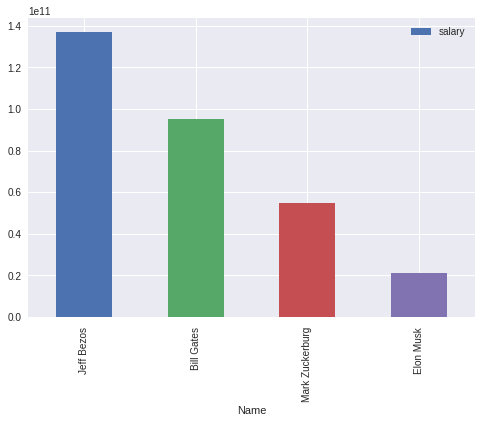

In [0]:
table.plot(kind='bar', x = 'Name', y = 'salary');

# Text Analysis

Lets do some sentiment analysis on our headlines `h2` elements

Maybe we're looking at a list of News headlines and we only want to read the ones we think are positive

In [0]:
# get all the h2s on the page and display each one
content = main_content.find_all('h2')


In [0]:
print(content)

[<h2 class="headline">I love this!</h2>, <h2 class="headline">I hate this so much!</h2>, <h2 class="headline">The dumbest thing happened</h2>, <h2 class="headline">This is a great workshop!</h2>, <h2 class="headline">This workshop is horrible</h2>, <h2 class="headline">I'm tired...</h2>, <h2 class="headline">This thing is ok...</h2>]


In [0]:
dataset =[]

for h2 in content:
    dataset.append(h2.text)
    


In [0]:
print(dataset)

['I love this!', 'I hate this so much!', 'The dumbest thing happened', 'This is a great workshop!', 'This workshop is horrible', "I'm tired...", 'This thing is ok...']


Import [NLTK](https://www.nltk.org/)(Natural Language Toolkit) python module

Yet again we're only going to use just a tiny bit of NLTK, but if you're intertested in Natural Language Processing you should totally read more about it!!!

In [0]:

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment(sentence):    
    sentiment = SentimentIntensityAnalyzer()
    score = sentiment.polarity_scores(sentence)
    return score
 

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
for headline in dataset:
  print("\n")
  print(headline)
  print(sentiment(headline))



I love this!
{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}


I hate this so much!
{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.6114}


The dumbest thing happened
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}


This is a great workshop!
{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


This workshop is horrible
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


I'm tired...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


This thing is ok...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Lets use Pandas to make our output better

In [0]:
nltk_results = [sentiment(headline) for headline in dataset]

import pandas as pd
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(dataset, columns = ['headline'])
nltk_df = text_df.join(results_df)

#print(nltk_results)
nltk_df


,headline,compound,neg,neu,pos
0,I love this!,0.6696,0.000,0.182,0.818
1,I hate this so much!,-0.6114,0.571,0.429,0.000
2,The dumbest thing happened,-0.5106,0.524,0.476,0.000
3,This is a great workshop!,0.6588,0.000,0.406,0.594
4,This workshop is horrible,-0.5423,0.538,0.462,0.000
5,I'm tired...,0.0000,0.000,1.000,0.000
6,This thing is ok...,0.0000,0.000,1.000,0.000


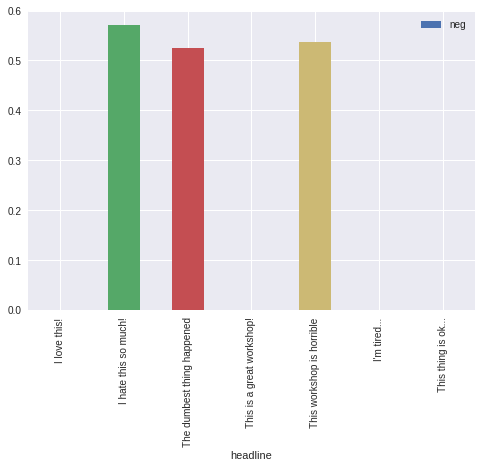

In [0]:
nltk_df.plot(kind='bar', x = 'headline', y = 'neg');

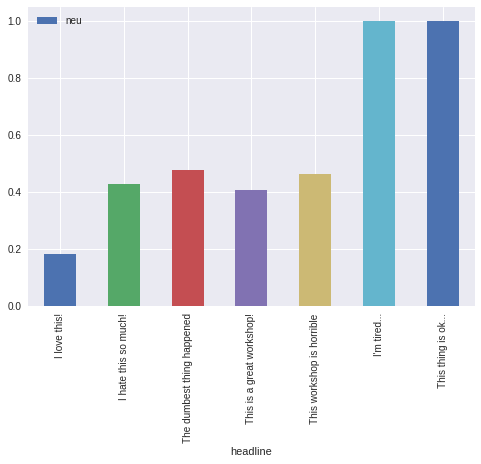

In [0]:
nltk_df.plot(kind='bar', x = 'headline', y = 'neu');

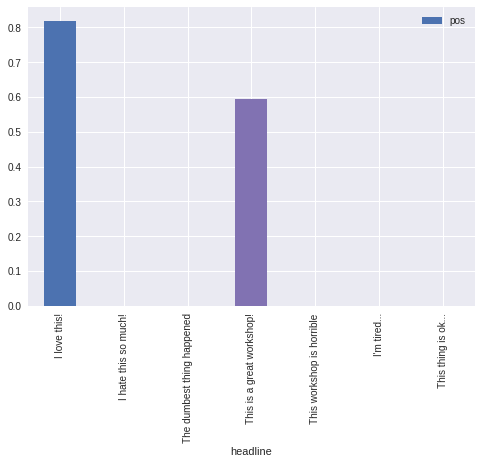

In [0]:
nltk_df.plot(kind='bar', x = 'headline', y = 'pos');

# Keep Learning Challenges!

- Redo everything here locally on your machine by installing python(Anaconda).

- Try a different web page! Maybe look at news site and analyze the headlines or content!

- Try making better visualizations with Matplotlib

- Save to a file or database on your computer

- Scrape Wikipedia page for a famous person and get their age, does it work if the person is no longer alive?

- Look up how to navigate and scrape pages linked together

  

# Resources:

- [Free Data Science Prep](https://www.galvanize.com/data-science-prep)


- Checkout [Scrapy](https://scrapy.org/). Another python module foring doing web scraping. 


## What is Galvanize?
###### We are a community!


#### Immersive Bootcamp

- [Data Science](https://www.galvanize.com/data-science) - 5/6/19 - 8/2/19 

- [Software Engineer](https://www.galvanize.com/web-development) - 2/19/19 - 5/17/19

#### Part-Time Courses

- [Data Analytics](https://www.galvanize.com/part-time/data-analytics) 2/12/19 - 5/2/19
- [Python Fundamentals](https://www.galvanize.com/part-time/data-science-fundamentals) - 2/20/19 - 3/29/19

#### Co-working Space

[work in our building!](https://www.galvanize.com/entrepreneur)

#### We are a community

## Questions

Please feel free to reach out to me with any questions! Let me know what you're planning to do next and how I can help!


- Website: [sageelliott.com](http://sageelliott.com/)
- Twitter: [@sagecodes](https://twitter.com/@sagecodes)
- LinkedIn: [sageelliott](https://www.linkedin.com/in/sageelliott/) 
- Email: [sage.elliott@galvanize.com](mailto:sage.elliott@galvanize.com)


Follow Sage on twitter [@sagecodes](https://twitter.com/sagecodes) or connect on [linkedin](https://www.linkedin.com/in/sageelliott/) 